<div style="float:left">
    <h1 style="width:600px">Assessment</h1>
    <h3 style="width:600px">CASA0002: Urban Simulation</h3>
    <h3 style="width:600px">Author: Andres Restrepo</h3>

</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Required libraries

In [1]:
import timeit
start_time = timeit.default_timer()
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt

## Data reading

### Underground network

In [2]:
G = nx.read_graphml('Data/Inputs/london.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

### OD matrix

In [4]:
OD = pd.read_csv('Data/Inputs/OD_matrix.csv',index_col='station_origin')
OD.rename_axis('station_destination', axis=1,inplace=True)

In [5]:
type(OD)

pandas.core.frame.DataFrame

### Flow data

In [6]:
london_OD_AMpeak = pd.read_csv('Data/Inputs/london_flows.csv')

In [7]:
type(london_OD_AMpeak)

pandas.core.frame.DataFrame

## Data inspection

### Underground network

In [8]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_22327/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [9]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': '(533127.7645573226, 181621.32983581326)'})

In [10]:
# #check that all distances are greater or equal to euclidean distance
# for u,v, data in G.edges(data=True):
#     assert(data['length'] >= distance.euclidean(pos[u], pos[v]))

In [11]:
#if want to know what is the maximum distance between stations
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.373927496304, 'line_name': 'Metropolitan', 'flows': 55124})

In [12]:
#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(u,v) for  u,v in G.edges() if u == 'Baker Street' or v == 'Baker Street']
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', "St. John's Wood")]

In [13]:
#if want to know to which stations Baker Street is directly connected to
Stratford = [(u,v) for  u,v in G.edges() if u == 'Stratford' or v == 'Stratford']
Stratford

[('Liverpool Street', 'Stratford'),
 ('Stratford', 'Maryland'),
 ('Stratford', 'Mile End'),
 ('Stratford', 'Leyton'),
 ('Stratford', 'Stratford High Street'),
 ('Stratford', 'Pudding Mill Lane'),
 ('Stratford', 'Stratford International'),
 ('Stratford', 'Hackney Wick'),
 ('Stratford', 'West Ham')]

In [14]:
#We can also check the degree of the nodes in our network and check that they make sense
deg_london = nx.degree(G)

In [15]:
df = pd.DataFrame(index = dict(deg_london).keys())
df['degree'] = dict(deg_london).values()

In [16]:
df.sort_values('degree', ascending =False).head(20)

,degree
Stratford,9
Bank and Monument,8
Baker Street,7
King's Cross St. Pancras,7
Liverpool Street,6
Green Park,6
Waterloo,6
West Ham,6
Oxford Circus,6
Canning Town,6


The inspecting results are consistent with the results of Practical 10.

### OD matrix

In [17]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, Abbey Road to All
Columns: 400 entries, Abbey Road to All
dtypes: int64(400)
memory usage: 1.2+ MB


In [18]:
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172


The inspecting results are consistent with the results of Practical 10.

### Flow data

In [19]:
london_OD_AMpeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [20]:
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


The inspecting results are consistent with the results of Practical 10.

# London’s underground resilience

## Topological network

![img](https://tfl.gov.uk/cdn/static/cms/images/london-rail-and-tube-services-map.gif)

In [21]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [22]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': (533127.7645573226, 181621.32983581326)})

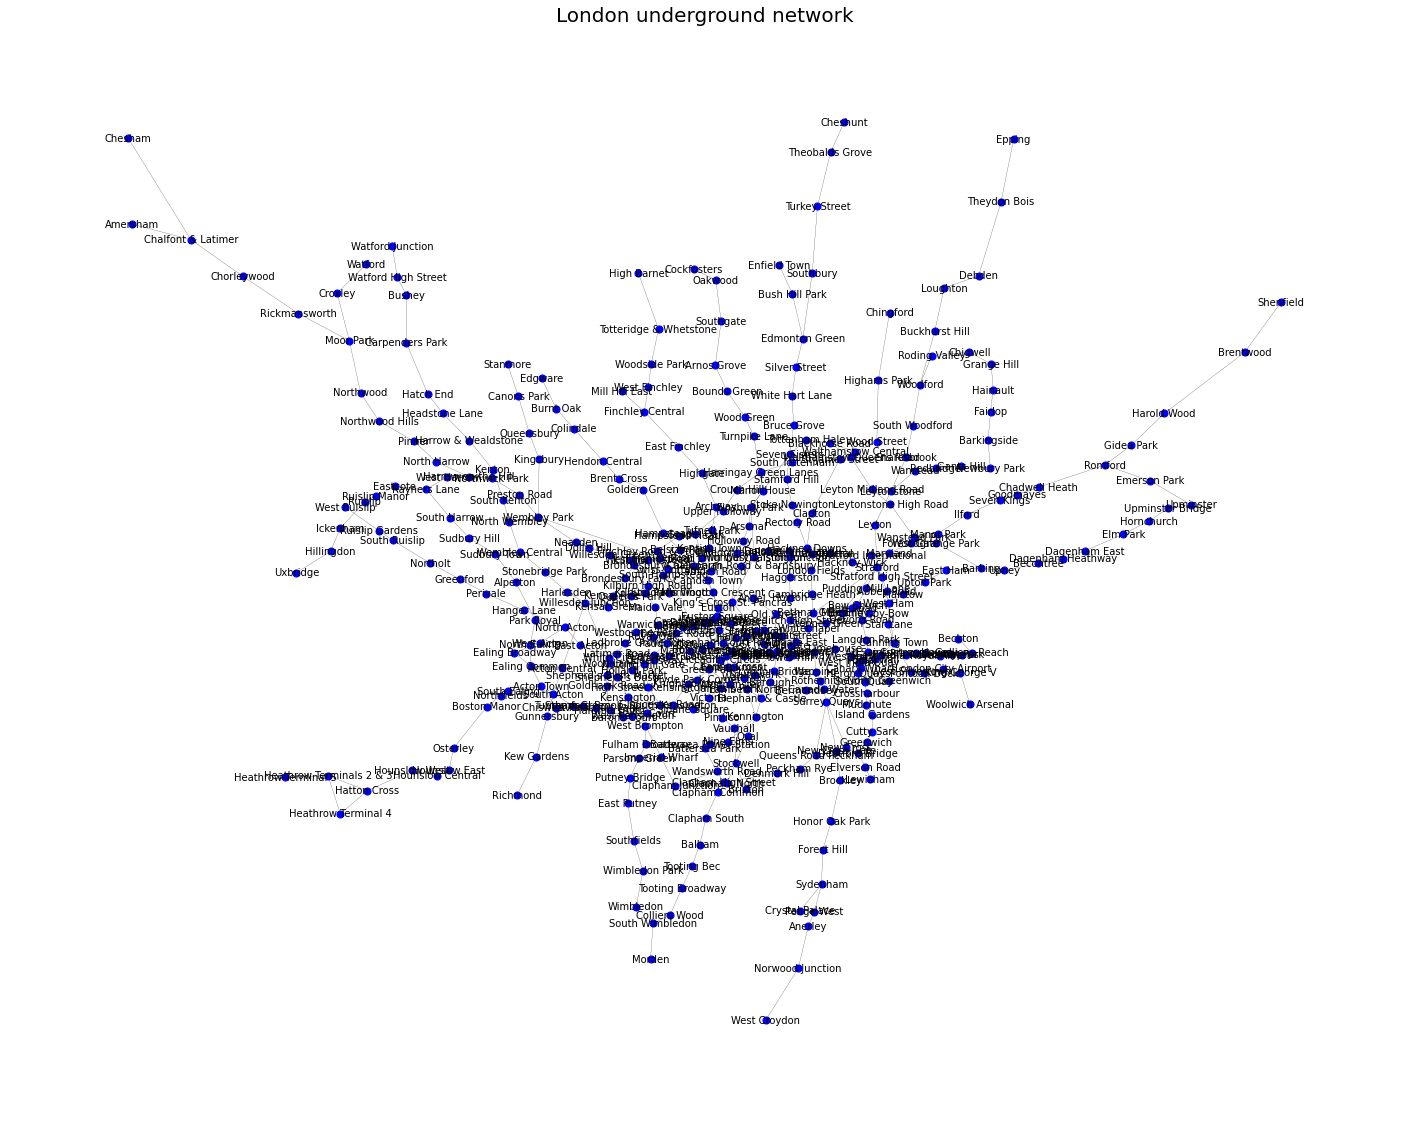

In [23]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(G, 'coords')

# Nodes
nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
# Edges
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
# Labels
nx.draw_networkx_labels(G,pos, font_size=10, font_color='black')

plt.title("London underground network",fontsize=20)
plt.axis("off")
plt.show()

**It better to normalized to compare more easily?**

### Centrality measures

**Include eigen vector centrality?**

#### Calculation

In [24]:
df_centrality = pd.DataFrame(index=G.nodes())

deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
df_centrality['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

clos_london = nx.closeness_centrality(G)
nx.set_node_attributes(G,clos_london,'closeness_t')
df_centrality['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness_t')
df_centrality['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

eig_london = nx.eigenvector_centrality_numpy(G)
nx.set_node_attributes(G,bet_london,'eigenvector_t')
df_centrality['eigenvector_t'] = pd.Series(nx.get_node_attributes(G, 'eigenvector_t'))
# Change the tolerance value



In [25]:
df_centrality.head(10).sort_values(by=['degree'],ascending=False)

,degree,closeness_t,betweenness_t,eigenvector_t
Stratford,0.0225,0.104384,0.297846,0.297846
Liverpool Street,0.0150,0.110254,0.270807,0.270807
Romford,0.0075,0.059058,0.032774,0.032774
Maryland,0.0050,0.095193,0.063973,0.063973
Forest Gate,0.0050,0.087489,0.059337,0.059337
Manor Park,0.0050,0.080939,0.054700,0.054700
Ilford,0.0050,0.075301,0.050064,0.050064
Seven Kings,0.0050,0.070398,0.045427,0.045427
Goodmayes,0.0050,0.066094,0.040791,0.040791
Chadwell Heath,0.0050,0.062334,0.036217,0.036217


#### Degree centrality

In [26]:
df_centrality['degree'].sort_values(ascending=False)

Stratford                   0.0225
Bank and Monument           0.0200
Baker Street                0.0175
King's Cross St. Pancras    0.0175
Liverpool Street            0.0150
                             ...  
Watford Junction            0.0025
Cockfosters                 0.0025
Stratford International     0.0025
Wimbledon                   0.0025
Stanmore                    0.0025
Name: degree, Length: 401, dtype: float64

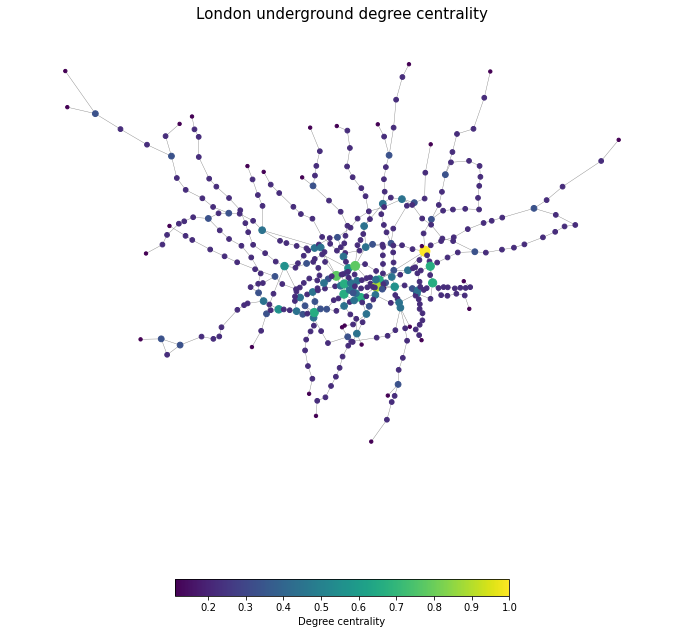

In [27]:
# Plot of degree centrality
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree
deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree and multipling it by 50
deg_size=[(i[1]['degree']/(max(degree_values)))*100 for i in G.nodes(data=True)]


# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))
# Edges
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
# Nodes
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

#### Closeness centrality

In [28]:
df_centrality['closeness_t'].sort_values(ascending=False)[0:10]

Green Park                  0.114778
Bank and Monument           0.113572
King's Cross St. Pancras    0.113443
Westminster                 0.112549
Waterloo                    0.112265
Oxford Circus               0.111204
Bond Street                 0.110988
Farringdon                  0.110742
Angel                       0.110742
Moorgate                    0.110314
Name: closeness_t, dtype: float64

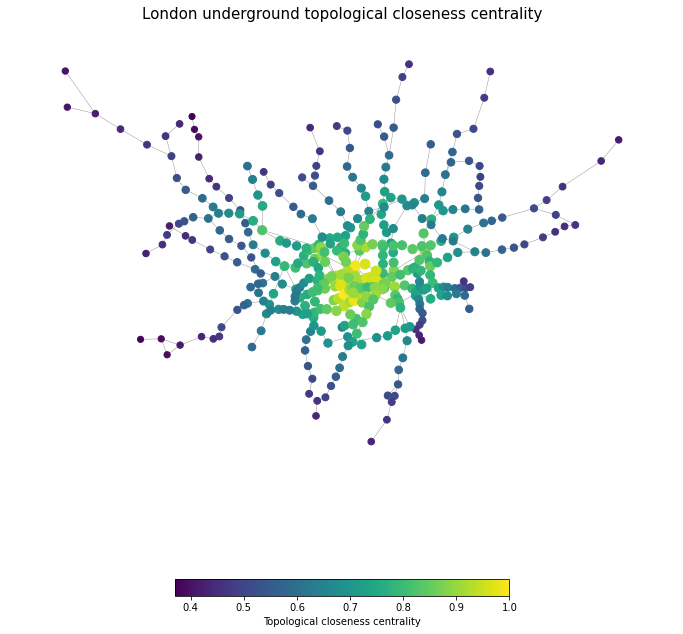

In [29]:
# Lets set color and width of nodes according to the closeness values
close_t_values=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

# close_t_color=[(i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values)) for i in G.nodes(data=True)]
# close_t_size=[((i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values))*50) for i in G.nodes(data=True)]

close_t_color=[(i[1]['closeness_t']/max(close_t_values)) for i in G.nodes(data=True)]
close_t_size=[(i[1]['closeness_t']/max(close_t_values)*100) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= close_t_color,
        node_size= close_t_size)

plt.colorbar(nod,label="Topological closeness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological closeness centrality",fontsize=15)
plt.show()

#### Betweenness centrality

In [30]:
df_centrality['betweenness_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: betweenness_t, dtype: float64

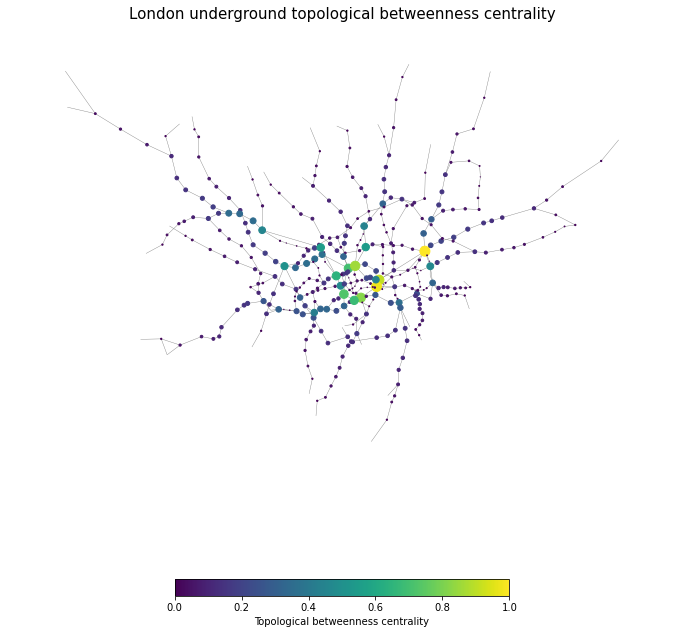

In [31]:
# Lets set colour and size of nodes according to betweenness values
bet_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(bet_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(bet_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Topological betweenness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological betweenness centrality",fontsize=15)
plt.show()

#### Eigenvector  centrality

In [32]:
df_centrality['eigenvector_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: eigenvector_t, dtype: float64

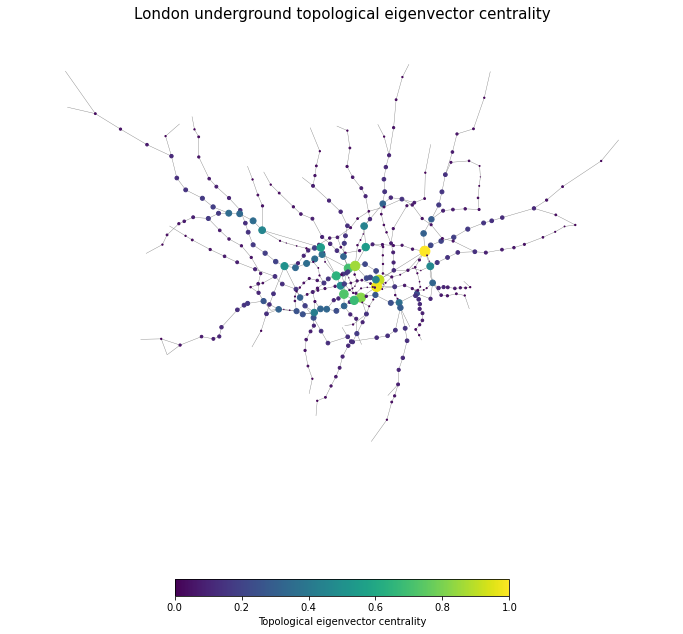

In [33]:
# Eigenvetor centrality
eig_t_values=[(i[1]['eigenvector_t']) for i in G.nodes(data=True)]
eig_t_color=[(i[1]['eigenvector_t']/max(eig_t_values)) for i in G.nodes(data=True)]
eig_t_size=[(i[1]['eigenvector_t']/max(eig_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= eig_t_color, node_size= eig_t_size)

plt.colorbar(nod,label="Topological eigenvector centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological eigenvector centrality",fontsize=15)
plt.show()

#### Results summary

In [34]:
df_ranking = pd.DataFrame()
rank = list(range(1, df_centrality.shape[0]+1))
df_ranking['rank'] = rank

degree_rank = df_centrality.sort_values(by='degree',ascending=False).index.values.tolist()
degree_value = df_centrality['degree'].sort_values(ascending=False).values.tolist()
clos_rank = df_centrality.sort_values(by='closeness_t',ascending=False).index.values.tolist()
clos_value = df_centrality['closeness_t'].sort_values(ascending=False).values.tolist()
bet_rank = df_centrality.sort_values(by='betweenness_t',ascending=False).index.values.tolist()
bet_value = df_centrality['betweenness_t'].sort_values(ascending=False).values.tolist()
eig_rank = df_centrality.sort_values(by='eigenvector_t',ascending=False).index.values.tolist()
eig_value = df_centrality['eigenvector_t'].sort_values(ascending=False).values.tolist()


df_ranking['Degree'] = degree_rank
df_ranking['Degree value'] = degree_value
df_ranking['Topological closeness'] = clos_rank
df_ranking['Closeness value'] = clos_value
df_ranking['Topological betweenness'] = bet_rank
df_ranking['Betweenness value'] = bet_value
df_ranking['Topological Eigenvector'] = eig_rank
df_ranking['Eigenvector value'] = eig_value

df_ranking.head(10)


,rank,Degree,Degree value,Topological closeness,Closeness value,Topological betweenness,Betweenness value,Topological Eigenvector,Eigenvector value
0,1,Stratford,0.0225,Green Park,0.114778,Stratford,0.297846,Stratford,0.297846
1,2,Bank and Monument,0.0200,Bank and Monument,0.113572,Bank and Monument,0.290489,Bank and Monument,0.290489
2,3,Baker Street,0.0175,King's Cross St. Pancras,0.113443,Liverpool Street,0.270807,Liverpool Street,0.270807
3,4,King's Cross St. Pancras,0.0175,Westminster,0.112549,King's Cross St. Pancras,0.255307,King's Cross St. Pancras,0.255307
4,5,Liverpool Street,0.0150,Waterloo,0.112265,Waterloo,0.243921,Waterloo,0.243921
5,6,Green Park,0.0150,Oxford Circus,0.111204,Green Park,0.215835,Green Park,0.215835
6,7,Waterloo,0.0150,Bond Street,0.110988,Euston,0.208324,Euston,0.208324
7,8,West Ham,0.0150,Farringdon,0.110742,Westminster,0.203335,Westminster,0.203335
8,9,Oxford Circus,0.0150,Angel,0.110742,Baker Street,0.191568,Baker Street,0.191568
9,10,Canning Town,0.0150,Moorgate,0.110314,Finchley Road,0.165085,Finchley Road,0.165085


In [35]:
# df_ranking.loc[]

### Impact measures

**Nodes**

In [36]:
#list(G.nodes())

**Number of nodes**

In [37]:
G.number_of_nodes()

401

**Diameter**

In [38]:
d=nx.diameter(G)
print(d)

36


**Average shortest path**

In [39]:
asp = nx.average_shortest_path_length(G)
print(asp)

13.545997506234414


**Number of connected components**

In [40]:
nx.number_connected_components(G)

1

**Size of the largest component**

In [41]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G.subgraph(largest_component)

In [42]:
Largest_subgraph.number_of_nodes()

401

In [43]:
type(components)

generator

In [44]:
# You can compute the diameter of the largest component
d_lc = nx.diameter(Largest_subgraph)
d_lc

36

**Size of multiple components**

In [45]:
# To comput the size ( number of node) of each component
Subg = [G.subgraph(c).copy() for c in nx.connected_components(G)]
[len(subgraph.nodes) for subgraph in Subg]

[401]

In [46]:
list([len(subgraph.nodes) for subgraph in Subg])

[401]

In [47]:
type([len(subgraph.nodes) for subgraph in Subg])

list

### Node removal

#### Non-sequential

In [48]:
# Copy of the initial network
G_copy = G.copy()

In [49]:
# Create a blank df
non_sq_df = pd.DataFrame()
#Create empy columns
non_sq_df['Nodes'] = np.nan
non_sq_df['Removed nodes'] = np.nan
non_sq_df['Diameter'] = np.nan
non_sq_df['Average shortest path'] = np.nan
non_sq_df['Number of connected components'] = np.nan
non_sq_df['Size of largest connected component'] = np.nan

In [50]:
# List of ranking lists
ranks = [degree_rank, clos_rank, bet_rank, eig_rank]

In [51]:
labels = ['Degree', 'Closeness', 'Betweenness', 'Eigenvector']

In [52]:
# For loop to calculate impact measures in non-sequential node removal
counter = 0
for r in ranks:
    #print(r)
    G_i = G_copy.copy()

    for station in r[0:21]: 
        # Remove a node from the graph
        
        #print(station) 
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_i):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_i)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_i)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            components = nx.connected_components(G_i)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_i.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            non_sq_df = pd.concat([non_sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com})], ignore_index=True)
            G_i.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_i), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_i.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
           

            # Add the station, number of nodes, and diameter to the DataFrame
            non_sq_df = pd.concat([non_sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com})], ignore_index=True)
            G_i.remove_node(station)
        
    counter += 1
        
    #print(counter)
        

In [53]:
non_sq_df.head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Degree


In [54]:
# #Working code
# fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(20, 7))
# plt.suptitle('Impact measure - Non-sequential node removal',fontsize=22)
# ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax4,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
# ax3.set_title("Number of connected components",fontsize=16)
# ax4.set_title("Size of largest connected component",fontsize=16)

# ax2.set_ylabel('')
# ax3.set_ylabel('')
# ax4.set_ylabel('')

# # ax1.set_yticklabels([])
# # ax2.set_yticklabels([]) # remove lable axis
# # ax2.set_yticks([])


# ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
# plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

# ax1.set_xlabel("Removed nodes",fontsize=14)
# ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

# for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
# 	label.set_fontsize(14)

# for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# # plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

In [55]:
# Selecting data for plotting
non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')].tail()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
79,385.0,16.0,70.0,22.306943,13.0,285.0,Eigenvector
80,384.0,17.0,70.0,22.306943,14.0,285.0,Eigenvector
81,383.0,18.0,72.0,23.631837,14.0,284.0,Eigenvector
82,382.0,19.0,72.0,23.613688,14.0,283.0,Eigenvector
83,381.0,20.0,43.0,16.671866,15.0,149.0,Eigenvector


In [56]:
# Selecting data for plotting
non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')].head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Degree


In [57]:
# Subsetting the df for plotting
non_sq_df_plot = non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')]

In [58]:
# Setting the theme
sns.set_theme()

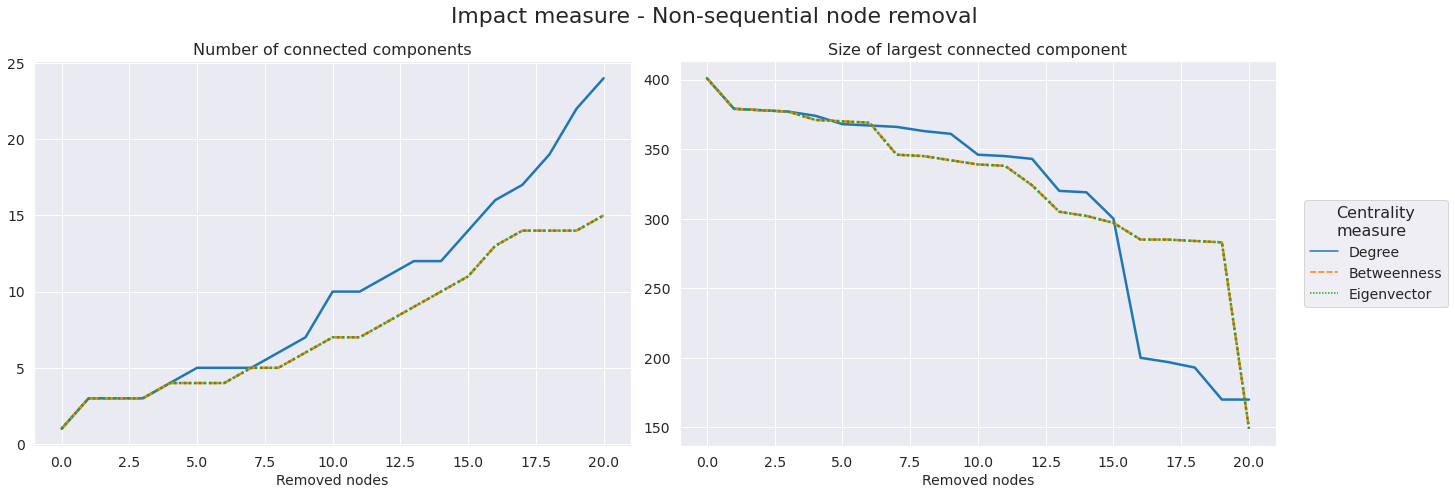

In [59]:
#Plotting just 3 centrality measures
fig, [ax1,ax2] = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Non-sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)

ax1.set_ylabel('')
ax2.set_ylabel('')
# ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

#### Sequential

In [60]:
measures = ['degree','closeness','betweenness','eigenvector']

In [61]:
# Define a dictionary of functions
functions_dict = {'degree': nx.degree_centrality,
                  'closeness': nx.closeness_centrality,
                  'betweenness': nx.betweenness_centrality,
                 'eigenvector':nx.eigenvector_centrality_numpy}

In [62]:
# Create a blank df
sq_df = pd.DataFrame()
#Create empy columns
sq_df['Nodes'] = np.nan
sq_df['Removed nodes'] = np.nan
sq_df['Diameter'] = np.nan
sq_df['Average shortest path'] = np.nan
sq_df['Number of connected components'] = np.nan
sq_df['Size of largest connected component'] = np.nan
sq_df['Node removed'] = np.nan

In [63]:
# Working code
counter = 0
for m in measures:
    #print(r)
    G_i = G_copy.copy()
    # print(m)

    for i in range(21): 
        # Remove a node from the graph
        
        # Calculate the centrality measure
        centrality_list = functions_dict[m](G_i)
        max_centrality_node = max(centrality_list, key=centrality_list.get)
        # print(max_centrality_node)
        
        # Check if the graph is connected
        if nx.is_connected(G_i):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_i)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_i)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            components = nx.connected_components(G_i)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_i.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()
            

        

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            sq_df = pd.concat([sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Node removed':max_centrality_node})], ignore_index=True)
            G_i.remove_node(max_centrality_node)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_i), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_i.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
           

            # Add the station, number of nodes, and diameter to the DataFrame
            sq_df = pd.concat([sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Node removed':max_centrality_node})], ignore_index=True)
            G_i.remove_node(max_centrality_node)
        
    counter += 1
        
    #print(counter)
        

In [64]:
sq_df.head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Stratford,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Bank and Monument,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,King's Cross St. Pancras,Degree
3,398.0,3.0,49.0,16.054927,3.0,377.0,Baker Street,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Oxford Circus,Degree


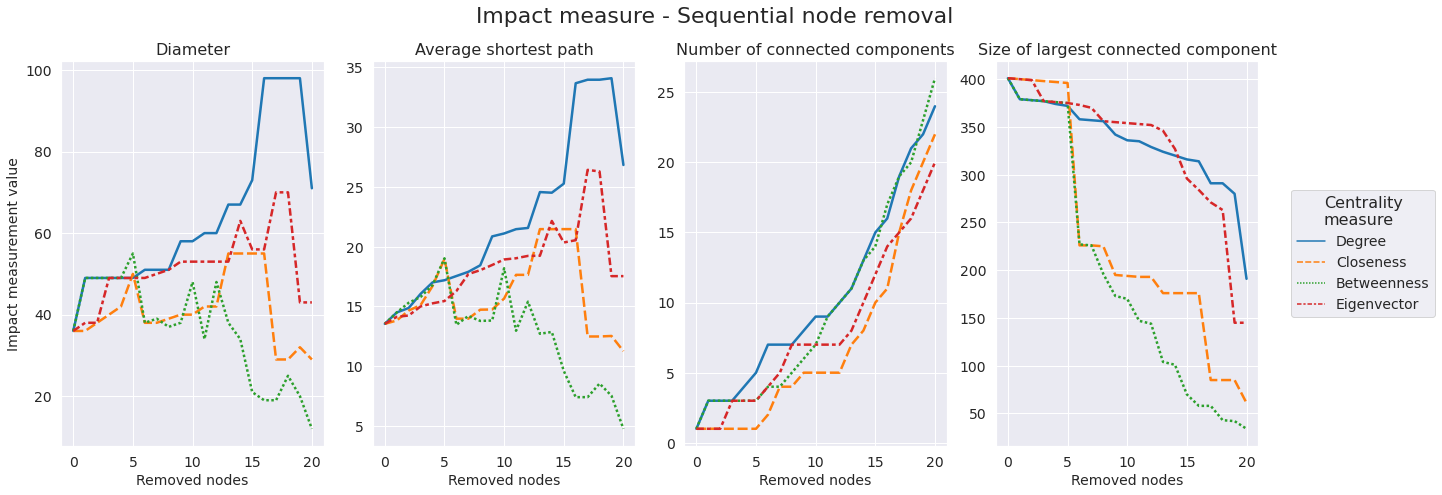

In [65]:
# Working code
# Plot for sequential
fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
sns.lineplot(data=sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax4,style='Centrality measure',linewidth = 2.5)


ax1.set_title("Diameter",fontsize=16)
ax2.set_title("Average shortest path",fontsize=16)
ax3.set_title("Number of connected components",fontsize=16)
ax4.set_title("Size of largest connected component",fontsize=16)

ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
ax3.set_xlabel("Removed nodes",fontsize=14)
ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

In [66]:
# Selecting data for plotting
sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')].tail()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
79,385.0,16.0,56.0,20.542975,14.0,284.0,Canada Water,Eigenvector
80,384.0,17.0,70.0,26.424409,15.0,271.0,Green Park,Eigenvector
81,383.0,18.0,70.0,26.288393,16.0,263.0,Wembley Park,Eigenvector
82,382.0,19.0,43.0,17.536207,18.0,145.0,Whitechapel,Eigenvector
83,381.0,20.0,43.0,17.536207,20.0,145.0,Notting Hill Gate,Eigenvector


In [67]:
# Selecting data for plotting
sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')].head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Stratford,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Bank and Monument,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,King's Cross St. Pancras,Degree
3,398.0,3.0,49.0,16.054927,3.0,377.0,Baker Street,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Oxford Circus,Degree


In [68]:
# Subsetting the df for plotting
sq_df_plot = sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')]

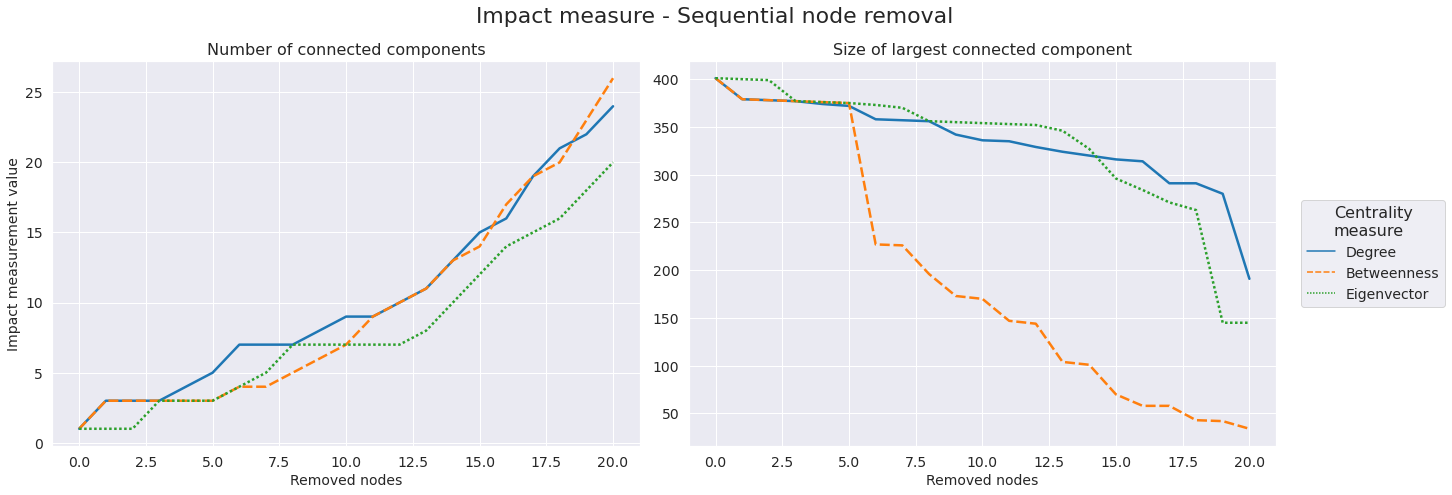

In [69]:
# Testing code
# Plot for sequential for degre, betweenness and eigenvector
fig, [ax1,ax2] = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
# sns.lineplot(data=sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)

ax2.set_ylabel('')
# ax3.set_ylabel('')
# ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

**Total results**

In [70]:
plot_labels = ['Degree','Betweenness', 'Eigenvector']

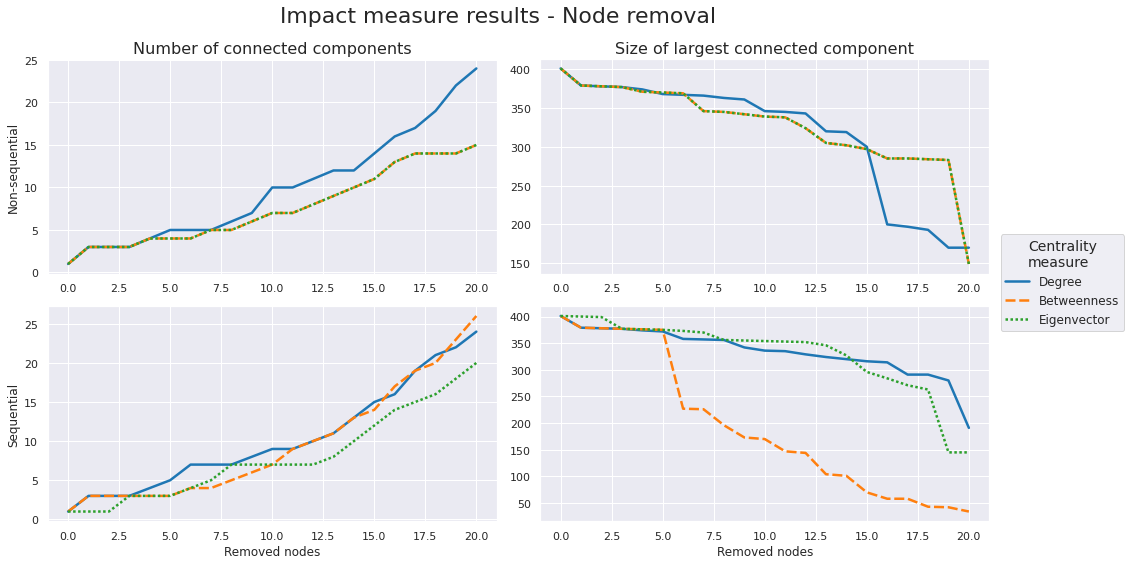

In [71]:
# Plot total results
fig, axes = plt.subplots(2, 2, sharey=False, tight_layout=True,figsize=(14, 8))
plt.suptitle('Impact measure results - Node removal',fontsize=22)
# axes[0,0].set_ylabel("Non-sequential",fontsize=14)
# axes[0,1].set_ylabel("Sequential",fontsize=14)

axes[0,0].set_title("Number of connected components",fontsize=16)
axes[0,1].set_title("Size of largest connected component",fontsize=16)


sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=axes[0,0],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=axes[0,1],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=axes[1,0],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=axes[1,1],style='Centrality measure',linewidth = 2.5)

axes[0,0].set_ylabel('Non-sequential')
axes[0,1].set_ylabel('')
axes[1,0].set_ylabel('Sequential')
axes[1,1].set_ylabel('')

# axes[0,0].get_xaxis().set_visible(False)
# axes[0,1].get_xaxis().set_visible(False)

axes[0,0].get_legend().remove()
axes[0,1].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')

# Change the location of legend
# plt.legend(bbox_to_anchor=(1.45,1),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)
fig.legend(bbox_to_anchor=(1.127,0.5),labels=plot_labels,loc='center right',title='Centrality\nmeasure',fontsize=12,title_fontsize=14)
# fig.legend(bbox_to_anchor=(0.5,-0.09),labels=plot_labels,loc="lower center",ncol=3,title='Centrality measure',fontsize=12,title_fontsize=14)
plt.savefig('Results_Impact_Measures_Total.jpg',dpi=300,bbox_inches='tight')

## Flows: weighted network

### Centrality measures

In [72]:
# Copy of the original network
G_w = G_copy.copy()

In [73]:
print(nx.info(G_w))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_22327/1022404788.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_w))


In [74]:
list(G_w.edges(data = True))[0]

('Liverpool Street',
 'Stratford',
 {'length': 6698.461270481078, 'line_name': 'TfL Rail', 'flows': 163165})

In [75]:
# Inspecting for zero valuea on the flows
zero_flows = [(u, v) for u, v, d in G_w.edges(data=True) if d['flows'] == 0]
print(zero_flows)

[('Wandsworth Road', 'Battersea Park'), ('Kennington', 'Nine Elms'), ('Battersea Power Station', 'Nine Elms')]


In [76]:
# Assignning non-zero value in flows
nx.set_edge_attributes(G_w, {('Wandsworth Road', 'Battersea Park'): {'flows': 1}, ('Kennington', 'Nine Elms'): {'flows': 1}, ('Battersea Power Station', 'Nine Elms'): {'flows': 1}})

In [77]:
# Inspecting after assignin non-zero values
zero_flows = [(u, v) for u, v, d in G_w.edges(data=True) if d['flows'] == 0]
print(zero_flows)

[]


In [78]:
# Inspecting after assignin non-zero values
zero_flows = [(u, v) for u, v, d in G_w.edges(data=True) if d['flows'] == 1]
print(zero_flows)

[('Wandsworth Road', 'Battersea Park'), ('Kennington', 'Nine Elms'), ('Battersea Power Station', 'Nine Elms')]


In [79]:
# Edge with the highest and lowest flow
# Highest
max_flow = max(G_w.edges(data=True), key=lambda x: x[2]['flows'])
print(max_flow)

('Bank and Monument', 'Waterloo', {'length': 2542.954443856927, 'line_name': 'Waterloo & City', 'flows': 233937})


In [80]:
# Lowest
min_flow = min(G_w.edges(data=True), key=lambda x: x[2]['flows'])
print(min_flow)

('Wandsworth Road', 'Battersea Park', {'length': 1168.4892614621972, 'line_name': 'London Overground', 'flows': 1})


In [81]:
# Invert the flows as it is supposed to be a distance
inv_flows={(e1, e2):round(1./flows,7) for e1, e2, flows in G_w.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G_w, inv_flows, 'inv_flows')

In [82]:
# Print head of edge list with attributes
list(G_w.edges(data = True))[0:5]

[('Liverpool Street',
  'Stratford',
  {'length': 6698.461270481078,
   'line_name': 'TfL Rail',
   'flows': 163165,
   'inv_flows': 6.1e-06}),
 ('Liverpool Street',
  'Bank and Monument',
  {'length': 841.5026837499356,
   'line_name': 'Central',
   'flows': 166338,
   'inv_flows': 6e-06}),
 ('Liverpool Street',
  'Bethnal Green',
  {'length': 2408.292001906184,
   'line_name': 'London Overground',
   'flows': 31970,
   'inv_flows': 3.13e-05}),
 ('Liverpool Street',
  'Aldgate East',
  {'length': 965.8659667184489,
   'line_name': 'Hammersmith & City',
   'flows': 18372,
   'inv_flows': 5.44e-05}),
 ('Liverpool Street',
  'Moorgate',
  {'length': 434.0874486023312,
   'line_name': 'Circle',
   'flows': 45522,
   'inv_flows': 2.2e-05})]

#### Calculation

In [83]:
df_centrality_w = pd.DataFrame(index=G_w.nodes())

deg_london =nx.degree_centrality(G_w)
nx.set_node_attributes(G_w,dict(deg_london),'degree')
df_centrality_w['degree'] = pd.Series(nx.get_node_attributes(G_w, 'degree'))

deg_london_w =G_w.degree(weight='flows')
nx.set_node_attributes(G_w,dict(deg_london_w),'degree_w')
df_centrality_w['degree_w'] = pd.Series(nx.get_node_attributes(G_w, 'degree_w'))

clos_london_w = nx.closeness_centrality(G_w,distance='inv_flows')
nx.set_node_attributes(G_w,clos_london_w,'closeness_w')
df_centrality_w['closeness_w'] = pd.Series(nx.get_node_attributes(G_w, 'closeness_w'))

bet_london_w = nx.betweenness_centrality(G_w,weight='inv_flows')
nx.set_node_attributes(G_w, bet_london_w, 'betweenness_w')
df_centrality_w['betweenness_w'] = pd.Series(nx.get_node_attributes(G_w, 'betweenness_w'))

eig_london_w = nx.eigenvector_centrality_numpy(G_w,weight='flows')
nx.set_node_attributes(G_w,eig_london_w,'eigenvector_w')
df_centrality_w['eigenvector_w'] = pd.Series(nx.get_node_attributes(G_w, 'eigenvector_w'))


In [84]:
df_centrality_w

,degree,degree_w,closeness_w,betweenness_w,eigenvector_w
Liverpool Street,0.0150,436027,95.922949,0.343496,2.828294e-01
Stratford,0.0225,369869,95.888022,0.326015,1.296296e-01
Maryland,0.0050,68380,95.640022,0.062945,1.154900e-02
Forest Gate,0.0050,65817,95.387718,0.058246,1.012949e-03
Manor Park,0.0050,62421,95.119201,0.053521,8.340693e-05
...,...,...,...,...,...
Kentish Town,0.0050,78744,95.554367,0.048872,4.180877e-04
Mornington Crescent,0.0050,3618,92.403136,0.000000,1.458307e-04
Goodge Street,0.0050,6823,93.652913,0.000000,4.235084e-04
Battersea Power Station,0.0025,1,0.499890,0.000000,4.437984e-13


#### Results summary

In [85]:
df_ranking_w = pd.DataFrame()
rank = list(range(1, df_centrality.shape[0]+1))
df_ranking_w['rank'] = rank

degree_rank = df_centrality_w.sort_values(by='degree',ascending=False).index.values.tolist()
degree_value = df_centrality_w['degree'].sort_values(ascending=False).values.tolist()
degree_rank_w = df_centrality_w.sort_values(by='degree_w',ascending=False).index.values.tolist()
degree_value_w = df_centrality_w['degree_w'].sort_values(ascending=False).values.tolist()
clos_rank_w = df_centrality_w.sort_values(by='closeness_w',ascending=False).index.values.tolist()
clos_value_w = df_centrality_w['closeness_w'].sort_values(ascending=False).values.tolist()
bet_rank_w = df_centrality_w.sort_values(by='betweenness_w',ascending=False).index.values.tolist()
bet_value_w = df_centrality_w['betweenness_w'].sort_values(ascending=False).values.tolist()
eig_rank_w = df_centrality_w.sort_values(by='eigenvector_w',ascending=False).index.values.tolist()
eig_value_w = df_centrality_w['eigenvector_w'].sort_values(ascending=False).values.tolist()


df_ranking_w['Degree'] = degree_rank
df_ranking_w['Degree value'] = degree_value
df_ranking_w['Weighted Degree'] = degree_rank_w
df_ranking_w['Weighted degree value'] = degree_value_w
df_ranking_w['Weighted closeness'] = clos_rank_w
df_ranking_w['Weighted closeness value'] = clos_value_w
df_ranking_w['Weighted betweenness'] = bet_rank_w
df_ranking_w['Weighted betweenness value'] = bet_value_w
df_ranking_w['Eigenvector'] = eig_rank_w
df_ranking_w['Eigenvector value'] = eig_value_w

df_ranking_w.head(10)


,rank,Degree,Degree value,Weighted Degree,Weighted degree value,Weighted closeness,Weighted closeness value,Weighted betweenness,Weighted betweenness value,Eigenvector,Eigenvector value
0,1,Stratford,0.0225,Bank and Monument,639731,Green Park,95.985104,Green Park,0.566143,Waterloo,0.529565
1,2,Bank and Monument,0.0200,Green Park,623732,Westminster,95.973669,Bank and Monument,0.512857,Bank and Monument,0.492596
2,3,Baker Street,0.0175,Waterloo,558332,Waterloo,95.964406,Waterloo,0.385526,Westminster,0.422510
3,4,King's Cross St. Pancras,0.0175,King's Cross St. Pancras,464531,Bank and Monument,95.954289,Westminster,0.360301,Green Park,0.314276
4,5,Liverpool Street,0.0150,Westminster,441533,Oxford Circus,95.951421,Liverpool Street,0.343496,Liverpool Street,0.282829
5,6,Green Park,0.0150,Liverpool Street,436027,Victoria,95.936881,Stratford,0.326015,Moorgate,0.132191
6,7,Waterloo,0.0150,Euston,380910,Bond Street,95.933941,Euston,0.285204,Stratford,0.129630
7,8,West Ham,0.0150,Stratford,369869,Liverpool Street,95.922949,Oxford Circus,0.267171,Oxford Circus,0.129360
8,9,Oxford Circus,0.0150,Oxford Circus,338758,Warren Street,95.912969,Victoria,0.256178,Bond Street,0.114834
9,10,Canning Town,0.0150,Baker Street,307579,Stratford,95.888022,Bond Street,0.255053,London Bridge,0.110298


### Impact measures

#### Calculation

In [86]:
# Create a blank df
w_results_df = pd.DataFrame()
#Create empy columns
w_results_df['Nodes'] = np.nan
w_results_df['Removed nodes'] = np.nan
w_results_df['Diameter'] = np.nan
w_results_df['Average shortest path'] = np.nan
w_results_df['Number of connected components'] = np.nan
w_results_df['Size of largest connected component'] = np.nan
w_results_df['Total flows in largest connected component'] = np.nan
w_results_df['Node removed'] = np.nan

In [87]:
w_results_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed


In [88]:
#ranks

In [89]:
# Testing code
# For loop to calculate impact measures
counter = 0
for r in ranks:
    #print(r)
    G_w = G_copy.copy()

    for station in r[0:4]: 
        # Remove a node from the graph
        
        #print(station) 
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_w):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_w)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_w)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            components = nx.connected_components(G_w)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_w.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])
           

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            w_results_df = pd.concat([w_results_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows,'Node removed':node_removed})], ignore_index=True)
            G_w.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_w), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_w.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})   
            
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])

            # Add the station, number of nodes, and diameter to the DataFrame
            w_results_df = pd.concat([w_results_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows,'Node removed':node_removed})], ignore_index=True)
            G_w.remove_node(station)
        
    counter += 1
        
    #print(counter)
        

In [90]:
w_results_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,8659707.0,Bank and Monument,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,8352128.0,Baker Street,Degree
4,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Closeness
5,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Closeness
6,399.0,2.0,38.0,14.382728,1.0,399.0,8608663.0,Bank and Monument,Closeness
7,398.0,3.0,42.0,15.983773,1.0,398.0,8144132.0,King's Cross St. Pancras,Closeness
8,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Betweenness
9,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Betweenness


In [91]:
# Subsetting the df for plotting
w_results_df = w_results_df[(w_results_df['Centrality measure']=='Degree') | (w_results_df['Centrality measure']=='Betweenness') | (w_results_df['Centrality measure']=='Eigenvector')]

Text(0.47, -0.1, 'Removed nodes\nDegree: Stratford, Bank and Monument, Baker Street\nBetweennes: Stratford, Bank and Monument, Liverpool Street\nEigenvector: Stratford, Bank and Monument, Liverpool Street')

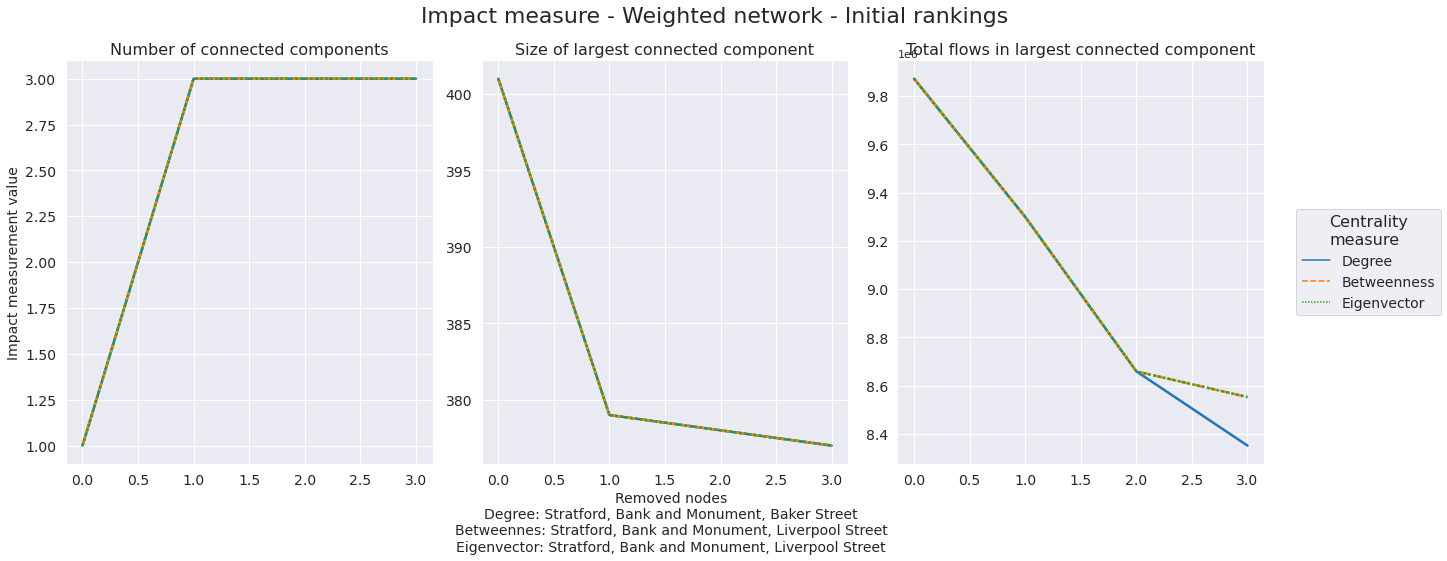

In [92]:
# Testing code
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Weighted network - Initial rankings',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_df, x="Removed nodes", y="Total flows in largest connected component",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)
ax3.set_title("Total flows in largest connected component",fontsize=16)

ax2.set_ylabel('')
ax3.set_ylabel('')
# ax4.set_ylabel('')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
# ax4.set_ylabel('')

# ax1.set_xticklabels([])
# ax2.set_xticklabels([]) # remove lable axis
# ax3.set_xticks([])


ax1.get_legend().remove()
ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

# ax1.set_xlabel("Removed nodes\nDegree: " + ', '.join(degree_rank[0:3]),fontsize=14)
# ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
	label.set_fontsize(14)

# plt.xlabel("common X")
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)
fig.text(0.47, -0.1, 'Removed nodes\n' + 'Degree: ' + ', '.join(degree_rank[0:3]) + '\nBetweennes: ' + ', '.join(bet_rank[0:3]) + '\nEigenvector: ' + ', '.join(eig_rank[0:3]), ha='center',fontsize=14)

In [93]:
# ranks = [degree_rank, clos_rank, bet_rank, eig_rank]

In [94]:
degree_rank[0:3]

['Stratford', 'Bank and Monument', 'Baker Street']

In [95]:
', '.join(degree_rank[0:3])

'Stratford, Bank and Monument, Baker Street'

In [96]:
', '.join(bet_rank[0:3])

'Stratford, Bank and Monument, Liverpool Street'

In [97]:
', '.join(eig_rank[0:3])

'Stratford, Bank and Monument, Liverpool Street'

In [98]:
# Create a blank df
w_results_rerun_df = pd.DataFrame()
#Create empy columns
w_results_rerun_df['Nodes'] = np.nan
w_results_rerun_df['Removed nodes'] = np.nan
w_results_rerun_df['Diameter'] = np.nan
w_results_rerun_df['Average shortest path'] = np.nan
w_results_rerun_df['Number of connected components'] = np.nan
w_results_rerun_df['Size of largest connected component'] = np.nan
w_results_rerun_df['Total flows in largest connected component'] = np.nan
w_results_rerun_df['Node removed'] = np.nan

In [99]:
w_results_rerun_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed


In [100]:
# List of weighted ranking lists
ranks_w = [degree_rank, clos_rank_w, bet_rank_w, eig_rank_w]

In [101]:
# Testing code
# For loop to calculate impact measures
counter = 0
for r in ranks_w:
    #print(r)
    G_w = G_copy.copy()

    for station in r[0:4]: 
        # Remove a node from the graph
        
        #print(station) 
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_w):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_w)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_w)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            components = nx.connected_components(G_w)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_w.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])
            

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            w_results_rerun_df = pd.concat([w_results_rerun_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows, 'Node removed': node_removed})], ignore_index=True)
            G_w.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_w), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_w.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])

            # Add the station, number of nodes, and diameter to the DataFrame
            w_results_rerun_df = pd.concat([w_results_rerun_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows,'Node removed': node_removed})], ignore_index=True)
            G_w.remove_node(station)
        
    counter += 1
        
    #print(counter)
        

In [102]:
w_results_rerun_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,8659707.0,Bank and Monument,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,8352128.0,Baker Street,Degree
4,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Closeness
5,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Closeness
6,399.0,2.0,38.0,14.021058,1.0,399.0,8984287.0,Westminster,Closeness
7,398.0,3.0,38.0,14.221612,1.0,398.0,8624162.0,Waterloo,Closeness
8,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Betweenness
9,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Betweenness


In [103]:
w_results_rerun_df[w_results_rerun_df['Removed nodes'] ==1]

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed,Centrality measure
1,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Degree
5,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Closeness
9,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Betweenness
13,400.0,1.0,38.0,13.960802,1.0,400.0,9313794.0,Waterloo,Eigenvector


In [104]:
# Subsetting the df for plotting
w_results_rerun_df = w_results_rerun_df[(w_results_rerun_df['Centrality measure']=='Degree') | (w_results_rerun_df['Centrality measure']=='Betweenness') | (w_results_rerun_df['Centrality measure']=='Eigenvector')]

Text(0.47, -0.1, 'Removed nodes\nDegree: Stratford, Bank and Monument, Baker Street\nBetweennes: Green Park, Bank and Monument, Waterloo\nEigenvector: Waterloo, Bank and Monument, Westminster')

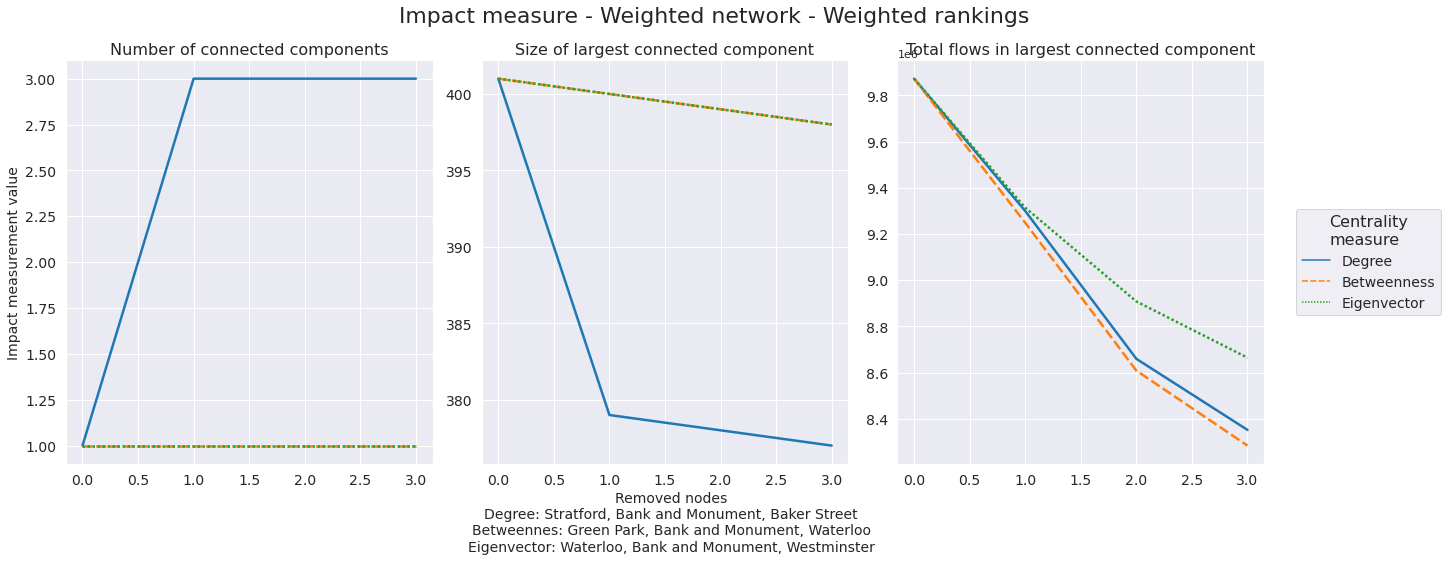

In [105]:
# Testing code
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Weighted network - Weighted rankings',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_rerun_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_rerun_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_rerun_df, x="Removed nodes", y="Total flows in largest connected component",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)
ax3.set_title("Total flows in largest connected component",fontsize=16)

ax2.set_ylabel('')
ax3.set_ylabel('')
# ax4.set_ylabel('')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

# ax1.set_xlabel("Removed nodes",fontsize=14)
# ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)
fig.text(0.47, -0.1, 'Removed nodes\n' + 'Degree: ' + ', '.join(degree_rank[0:3]) + '\nBetweennes: ' + ', '.join(bet_rank_w[0:3]) + '\nEigenvector: ' + ', '.join(eig_rank_w[0:3]), ha='center',fontsize=14)

# Spatial interaction models

In [106]:
# Data review

In [107]:
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172


In [108]:
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


**Check for intra station flows flows**

In [109]:
london_OD_AMpeak[london_OD_AMpeak.station_origin == london_OD_AMpeak.station_destination]

,station_origin,station_destination,flows,population,jobs,distance
4985,Blackfriars,Blackfriars,1,6781,10849,0.0
8847,Canary Wharf,Canary Wharf,0,14632,58772,0.0
9444,Cannon Street,Cannon Street,0,3874,4698,0.0
16611,Elephant & Castle,Elephant & Castle,0,9325,6427,0.0
17552,Euston,Euston,0,17796,16800,0.0
17807,Euston Square,Euston Square,0,4926,8093,0.0
18940,Finsbury Park,Finsbury Park,0,24735,6769,0.0
21752,Hackney Central,Hackney Central,0,3370,2440,0.0
21809,Hackney Downs,Hackney Downs,1,843,835,0.0
22242,Hammersmith,Hammersmith,0,11818,18250,0.0


In [110]:
london_OD_AMpeak["TotalNoIntra"] = london_OD_AMpeak.apply(lambda x: 0 if x['station_origin'] == x['station_destination'] else x['flows'], axis=1)

In [111]:
london_OD_AMpeak

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [114]:
# Pivot table for new OD matrix
london_OD_AMpeak_pivot = pd.pivot_table(london_OD_AMpeak, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
 london_OD_AMpeak_pivot

In [114]:
# Pivot table for new OD matrix
london_OD_AMpeak_pivot = pd.pivot_table(london_OD_AMpeak, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
 london_OD_AMpeak_pivot

## Attraction-constrained model

### Review the data

In [ ]:
plt.subplots(figsize=(10,10))

plt.hist(london_OD_AMpeak["TotalNoIntra"], histtype="stepfilled" , bins = 200)
plt.xlabel("London travel to work flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)

In [ ]:
#subset the dataframe to the flows we want
london_OD_AMpeak_flows = london_OD_AMpeak[["TotalNoIntra", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
london_OD_AMpeak_flows = london_OD_AMpeak_flows[(london_OD_AMpeak_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(london_OD_AMpeak_flows["distance"])
y = np.log(london_OD_AMpeak_flows["TotalNoIntra"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(Dist)", fontsize = 20)
ax.set_ylabel("log(Total)", fontsize = 20)

### Run the initial model

In [ ]:
O_i = pd.DataFrame(london_OD_AMpeak.groupby(["station_origin"])["TotalNoIntra"].agg(np.sum))
O_i.rename(columns={"TotalNoIntra":"O_i"}, inplace = True)
london_OD_AMpeak = london_OD_AMpeak.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(london_OD_AMpeak.groupby(["station_destination"])["TotalNoIntra"].agg(np.sum))
D_j.rename(columns={"TotalNoIntra":"D_j"}, inplace = True)
london_OD_AMpeak = london_OD_AMpeak.merge(D_j, on = "station_destination", how = "left" )

#### Non zero values

#### Transform variables of interest

##### Logging variables

In [ ]:
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_OD_AMpeak[f"log_{x}"] = np.log(london_OD_AMpeak[x]+1)
    log_x_vars.append(f"log_{x}")

In [ ]:
london_OD_AMpeak

In [ ]:
london_OD_AMpeak[london_OD_AMpeak.population==0].head()

In [ ]:
london_OD_AMpeak[london_OD_AMpeak.jobs==0].head()

In [ ]:
london_OD_AMpeak[london_OD_AMpeak.distance==0].head()

In [ ]:
london_OD_AMpeak[london_OD_AMpeak.station_destination=='Canary Wharf'].head()

#### Run Poisson distribution loged variables

In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form = 'TotalNoIntra ~ station_destination + log_population + log_distance-1'
#run a production constrained sim
attrSim = smf.glm(formula = attr_form, data=london_OD_AMpeak, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim.summary())

The $\alpha$ parameter related to the destination attractiveness: 0.7733

The $\beta$ distance decay parameter: 0.2534. Recall the negative sign in the equation.

We can see from the standard outputs from the model that all of the explanatory variables are statistically significant (P>|z| < 0.01) and the z-scores indicate that the origin population is having the most influence on the model. And then we have a series of paramaters which are the vector of $\alpha_i$ values associated with our origin constraints.

In [ ]:
#get the predictions
predictions = attrSim.get_prediction(london_OD_AMpeak[["station_destination", "log_population", "log_distance"]])
predictions_summary_frame = predictions.summary_frame()
london_OD_AMpeak["attrsimFitted"] = round(predictions_summary_frame["mean"],0)
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
london_OD_AMpeak_pivot_1 = london_OD_AMpeak.pivot_table(values ="attrsimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
london_OD_AMpeak_pivot_1

Compared to..

In [ ]:
london_OD_AMpeak_pivot

#### Goodnes of fit

In [ ]:
# Functions to measure goodness of fit
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [ ]:
CalcRSquared(london_OD_AMpeak["TotalNoIntra"], london_OD_AMpeak["attrsimFitted"])

In [ ]:
CalcRMSE(london_OD_AMpeak["TotalNoIntra"], london_OD_AMpeak["attrsimFitted"])

#### Run Poisson distribution non loged variables

In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form_2 = 'TotalNoIntra ~ station_destination + population + distance-1'
#run a production constrained sim
attrSim_2 = smf.glm(formula = attr_form_2, data=london_OD_AMpeak, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim_2.summary())

In [ ]:
#get the predictions
predictions_2 = attrSim_2.get_prediction(london_OD_AMpeak[["station_destination", "population", "distance"]])
predictions_summary_frame_2 = predictions_2.summary_frame()
london_OD_AMpeak["attrsimFitted2"] = round(predictions_summary_frame_2["mean"],0)
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
london_OD_AMpeak_pivot_2 = london_OD_AMpeak.pivot_table(values ="attrsimFitted2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
london_OD_AMpeak_pivot_2

In [ ]:
CalcRSquared(london_OD_AMpeak["TotalNoIntra"], london_OD_AMpeak["attrsimFitted2"])

In [ ]:
CalcRMSE(london_OD_AMpeak["TotalNoIntra"], london_OD_AMpeak["attrsimFitted2"])

#### Assigning new populatio value for if scenario

In [ ]:
#create a new pop function to change the value with

def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 58772/2
    else:
        val = row["jobs"]
    return val

london_OD_AMpeak["jobs_scenario"] = london_OD_AMpeak.apply(new_jobs, axis=1)
#create a variable called Oi2_origpop_scenario while applying the new_pop function
london_OD_AMpeak.head(5)
#check the result to make sure it has been applied

In [ ]:
london_OD_AMpeak[london_OD_AMpeak.station_destination=='Canary Wharf'].head()

#### Extracting the coeficients from previous attraction model

In [ ]:
#create a coefficients dataframe from the attrSim model
coefs2 = pd.DataFrame(attrSim_2.params)
coefs2.reset_index(inplace=True)
coefs2.rename(columns = {0:"gamma_j", "index":"coef"}, inplace = True)

In [ ]:
coefs2

In [ ]:
to_repl = ["station_destination", "\[", "\]"]
for x in to_repl:
    coefs2["coef"] = coefs2["coef"].str.replace(x, "")

In [ ]:
coefs2

In [ ]:
#then once you have done this you can join them back into the dataframes
london_OD_AMpeak = london_OD_AMpeak.merge(coefs2, left_on="station_destination", right_on="coef", how = "left")
london_OD_AMpeak.drop(columns = ["coef"], inplace = True)
#check this has worked
london_OD_AMpeak.head()

#### Extracting alpha and beta from previous attraction model

In [ ]:
#extract alpha and beta from the
#attrSim model
gamma_j= attrSim_2.params[0:399]
alpha = attrSim_2.params[399]
beta = -attrSim_2.params[400]

In [ ]:
alpha

In [ ]:
beta

In [ ]:
gamma_j

#### Raw result with new wage of if scenario (without recalculating balancing factores)

In [ ]:
#create estimate for attrsimest2
#using the calculated Beta_j and alpha and beta values


london_OD_AMpeak["attrsimFitted3"] = np.exp(london_OD_AMpeak["gamma_j"]+alpha*np.log(london_OD_AMpeak["jobs_scenario"])-beta*london_OD_AMpeak["log_distance"]) 

# cdatasub["attrsimest2"] = np.exp(cdatasub["gamma_j"]+alpha*np.log(cdatasub["Oi2_origpopScenario"]) - beta*cdatasub["log_Dist"])

#round these to integer values
#as we don't want half a person
london_OD_AMpeak["attrsimFitted3"] = round(london_OD_AMpeak["attrsimFitted3"],0)
#now we can convert the pivot table into a matrix
#called cdatasubmat7
london_OD_AMpeak_pivot_3 = london_OD_AMpeak.pivot_table(values ="attrsimFitted3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

#display the results
london_OD_AMpeak_pivot_3

Compare to...

In [ ]:
london_OD_AMpeak_pivot

#### Calculating new balancing factor $B_J$ for base scenario

In [ ]:
#calculate some new Oi^alpha and d_ij^beta values
#called oi2_alpha and dist_beta
Oi2_alpha = cdatasub["Oi1_origpop"]**alpha
dist_beta = cdatasub["Dist"]**(-beta)

#calcualte the first stage of the Bj values
cdatasub['Bj1'] = Oi2_alpha * dist_beta

#now do the sum over all is bit
B_i = pd.DataFrame(cdatasub.groupby(["DestCodeNew"])["Bj1"].agg(np.sum))

#now divide into 1
B_i["Bj1"] = 1/B_i["Bj1"]

#rename the column from Bj1 to B_j
B_i.rename(columns={"Bj1":"B_j"}, inplace=True)

#and write the B_j values back into the dataframe
cdatasub = cdatasub.merge(B_i, left_on="DestCodeNew", right_index=True, how="left")

In [ ]:
#calculate some new Oi^alpha and d_ij^beta values
#called oi2_alpha and dist_beta
Oi2_alpha = london_OD_AMpeak["population"]**alpha
dist_beta = london_OD_AMpeak["distance"]**(-beta)

#calcualte the first stage of the Bj values
london_OD_AMpeak['Bj1'] = Oi2_alpha * dist_beta

#now do the sum over all is bit
B_i = pd.DataFrame(london_OD_AMpeak.groupby(["station_destination"])["Bj1"].agg(np.sum))

#now divide into 1
B_i["Bj1"] = 1/B_i["Bj1"]

#rename the column from Bj1 to B_j
B_i.rename(columns={"Bj1":"B_j"}, inplace=True)

#and write the B_j values back into the dataframe
london_OD_AMpeak = london_OD_AMpeak.merge(B_i, left_on="station_destination", right_index=True, how="left")

In [ ]:
london_OD_AMpeak

In [ ]:
london_OD_AMpeak.columns

\begin{equation} \label{eq:8} \tag{8}
\lambda_{ij} \exp (\alpha \ln O_i + \gamma_i - \beta \ln d_{ij})
\end{equation}

#### Reviewing consistencyof new balancing factor $B_J$ for base scenario

In [ ]:
cdatasub["prodsimest2"] = np.exp(cdatasub["alpha_i"]+gamma*np.log(cdatasub["Dj3_destsalScenario"]) - beta*cdatasub["log_Dist"])
cdatasub["attrsimest4"] = cdatasub["B_j2"]*cdatasub["D_j"]*Oi3_alpha*dist_beta
cdatasub["attrsimest3"] = cdatasub["B_j"]*cdatasub["D_j"]*Oi2_alpha*dist_beta

In [ ]:
#to check that everything works, recreate the original estimates
#using equation 5 above and assign to attrsimest3
london_OD_AMpeak["attrsimFitted4"] = london_OD_AMpeak["B_j"]*london_OD_AMpeak["D_j"]*Oi2_alpha*dist_beta
#round
london_OD_AMpeak["attrsimFitted4"] = round(london_OD_AMpeak["attrsimFitted4"])


#check the head of the results
london_OD_AMpeak[["attrsimFitted2","attrsimFitted4"]].head()

### Models and calibration

#### Introduction

#### Parameter calibration

### Scenarios

#### Scenario A

#### Scenario B

#### Scenarios discussion

In [ ]:
print('Complete run time: ' + str((timeit.default_timer() - start_time)/60)+' minutes.')